Возьмите датасет Mortality and Water Hardness  
https://www.kaggle.com/ukveteran/mortality-and-water-hardness  
В этом датасете содержатся данные по средней годовой смертности на
100000 населения и концентрации кальция в питьевой воде для 61
большого города в Англии и Уэльсе. Города дополнительно поделены на
северные и южные.

1. Задача - ответить на вопрос есть ли связь между жёсткостью воды и
средней годовой смертностью?  
a. Построить точечный график  
b. Рассчитать коэффициенты корреляции Пирсона и Спирмена  
c. Построить модель линейной регрессии  
d. Рассчитать коэффициент детерминации  
e. Вывести график остатков

2. Сохраняется ли аналогичная зависимость для северных и южных городов
по отдельности?  
a. Разделить данные на 2 группы  
b. Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [1]:
import pandas as pd

## Подготовка данных

In [7]:
df = pd.read_csv('water.csv')
df.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


In [8]:
# Переименуем столбец без имени в номер
df.rename(columns={'Unnamed: 0': '№'}, inplace=True)
df.head()

,№,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


In [9]:
# Усттановим стоблец № в качестве индекса
df.set_index('№', inplace=True)
df.head()

,location,town,mortality,hardness
№,,,,
1,South,Bath,1247,105
2,North,Birkenhead,1668,17
3,South,Birmingham,1466,5
4,North,Blackburn,1800,14
5,North,Blackpool,1609,18


## Задача 1

### Точечный график

<AxesSubplot:title={'center':'Корреляция жесткости воды и смертности'}, xlabel='hardness', ylabel='mortality'>

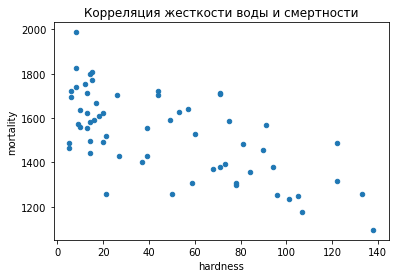

In [13]:
# Точечный график корреляции смертности и жесткости воды
df.plot(kind='scatter', x='hardness', y='mortality',
       title='Корреляция жесткости воды и смертности')

На взгляд прослеживается не сильная обратная коррелиция, т.е. чем выше жесткость воды тем ниже смертность.

### Коэффициенты корреляции Пирсона и Спирмена

In [16]:
# Коэфф. коррелиции Пирсона
df[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [17]:
# Коэфф. коррелиции Спирмена
df[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


Собственно подтвержается то, что видим на графине, не сильную обратную корреляцию - около -0.65

### Построить модель линейной регрессии

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [19]:
# создаем признаки (X) и что будем предсказывать (y). Признак у нас в данном случае один - жесткость воды,
# а предсказывать будем смертность
X = df[['hardness']]
y = df['mortality']

In [20]:
# разделяем данные на учебную и тестову выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [23]:
# Обучаем модель
model = LinearRegression()
model.fit(X_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [24]:
model.coef_

array([-3.31576799])

сравним реальные данные с предсказанными

In [25]:
y_pred = model.predict(X_test)
y_pred

array([1330.78489376, 1645.78285279, 1632.51978083, 1533.04674114,
       1420.31062948, 1612.62517289, 1237.94339004, 1430.25793345,
       1609.3094049 , 1659.04592475, 1483.31022129, 1410.36332551,
       1549.62558108, 1632.51978083, 1443.52100541, 1549.62558108])

In [26]:
res_df = X_test.copy()

res_df['y_pred'] = y_pred
res_df['y_test'] = y_test
res_df

,hardness,y_pred,y_test
№,,,
1,105,1330.784894,1247
6,10,1645.782853,1558
47,14,1632.519781,1495
32,44,1533.046741,1702
14,78,1420.310629,1307
56,20,1612.625173,1625
35,133,1237.943390,1259
50,75,1430.257933,1587
13,21,1609.309405,1519


### Рассчитать коэффициент детерминации

In [27]:
model.score(X_test, y_test)

0.410213439338294

предсказывает лучше чем "наивная" модель на основе среднего (коэф. > 0), но далеко не идеально, но оно и понятно, признак всего один и не сильная корреляция.

### Вывести график остатков

In [28]:
import seaborn as sns

<AxesSubplot:xlabel='y_pred'>

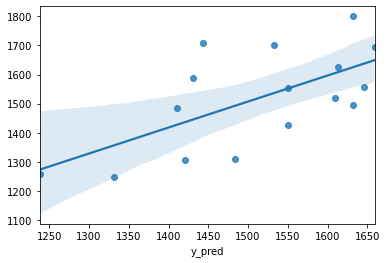

In [29]:
sns.regplot(x=res_df['y_pred'], y=[res_df['y_test']])

## Задача 2
Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

### Разделить данные на 2 группы

In [30]:
df.head()

,location,town,mortality,hardness
№,,,,
1,South,Bath,1247,105
2,North,Birkenhead,1668,17
3,South,Birmingham,1466,5
4,North,Blackburn,1800,14
5,North,Blackpool,1609,18


In [32]:
df_South = df[df['location'] == 'South']
df_South.head()

,location,town,mortality,hardness
№,,,,
1,South,Bath,1247,105
3,South,Birmingham,1466,5
8,South,Bournemouth,1299,78
10,South,Brighton,1359,84
11,South,Bristol,1392,73


In [33]:
df_North = df[df['location'] == 'North']
df_North.head()

,location,town,mortality,hardness
№,,,,
2,North,Birkenhead,1668,17
4,North,Blackburn,1800,14
5,North,Blackpool,1609,18
6,North,Bolton,1558,10
7,North,Bootle,1807,15


<AxesSubplot:title={'center':'Корреляция жесткости воды и смертности на Юге'}, xlabel='hardness', ylabel='mortality'>

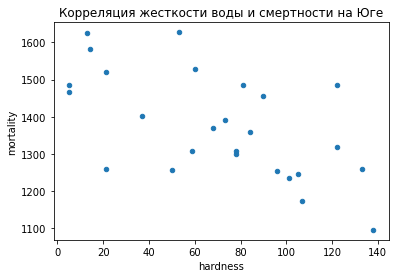

In [34]:
# Точечный график корреляции смертности и жесткости воды Южных городов
df_South.plot(kind='scatter', x='hardness', y='mortality',
       title='Корреляция жесткости воды и смертности на Юге')

<AxesSubplot:title={'center':'Корреляция жесткости воды и смертности на Севере'}, xlabel='hardness', ylabel='mortality'>

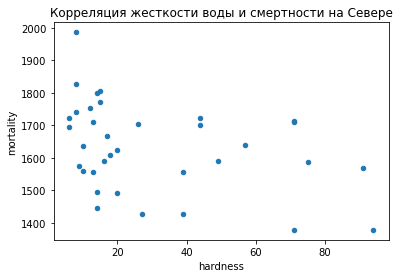

In [35]:
# Точечный график корреляции смертности и жесткости воды Северных городов
df_North.plot(kind='scatter', x='hardness', y='mortality',
       title='Корреляция жесткости воды и смертности на Севере')

по отдельности как то вообще особо корреляция не проглядывается, или очень слабая.

In [36]:
# Коэфф. коррелиции Пирсона на Юге
df_South[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [37]:
# Коэфф. коррелиции Пирсона на Сервере
df_North[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


In [38]:
# Коэфф. коррелиции Спирмена на Юге
df_South[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


In [39]:
# Коэфф. коррелиции Спирмена на Сервере
df_North[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


На Юге корреляция сильнее (0.6) чем на севере (0.4)

### Модель для Юга

In [40]:
X = df_South[['hardness']]
y = df_South['mortality']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [60]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [61]:
model.coef_

array([-2.15416968])

In [62]:
# коэф. детерминации
model.score(X_test, y_test)

-0.2677102791044872

вообще отрицательный получился коэф. детерминации, ну это скорее из-за того что данных мало

<AxesSubplot:ylabel='mortality'>

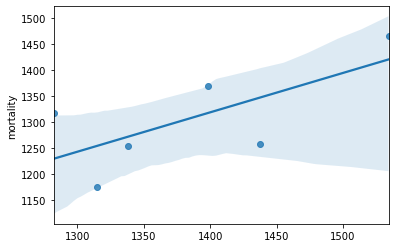

In [63]:
# график остатков
sns.regplot(x=model.predict(X_test), y=y_test)

### Модель для Юга

In [64]:
X = df_North[['hardness']]
y = df_North['mortality']

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [86]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [87]:
model.coef_

array([-1.98562728])

In [88]:
# коэф. детерминации
model.score(X_test, y_test)

-0.08472011839530391

<AxesSubplot:ylabel='mortality'>

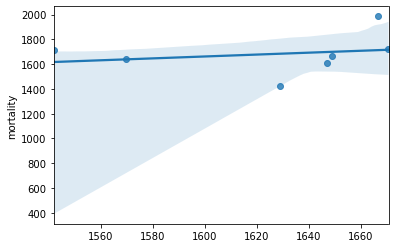

In [89]:
# график остатков
sns.regplot(x=model.predict(X_test), y=y_test)